C:\Users\johan\AppData\Local\Temp\ipykernel_25920\2546613631.py:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  original_corr_matrix = df.corr()


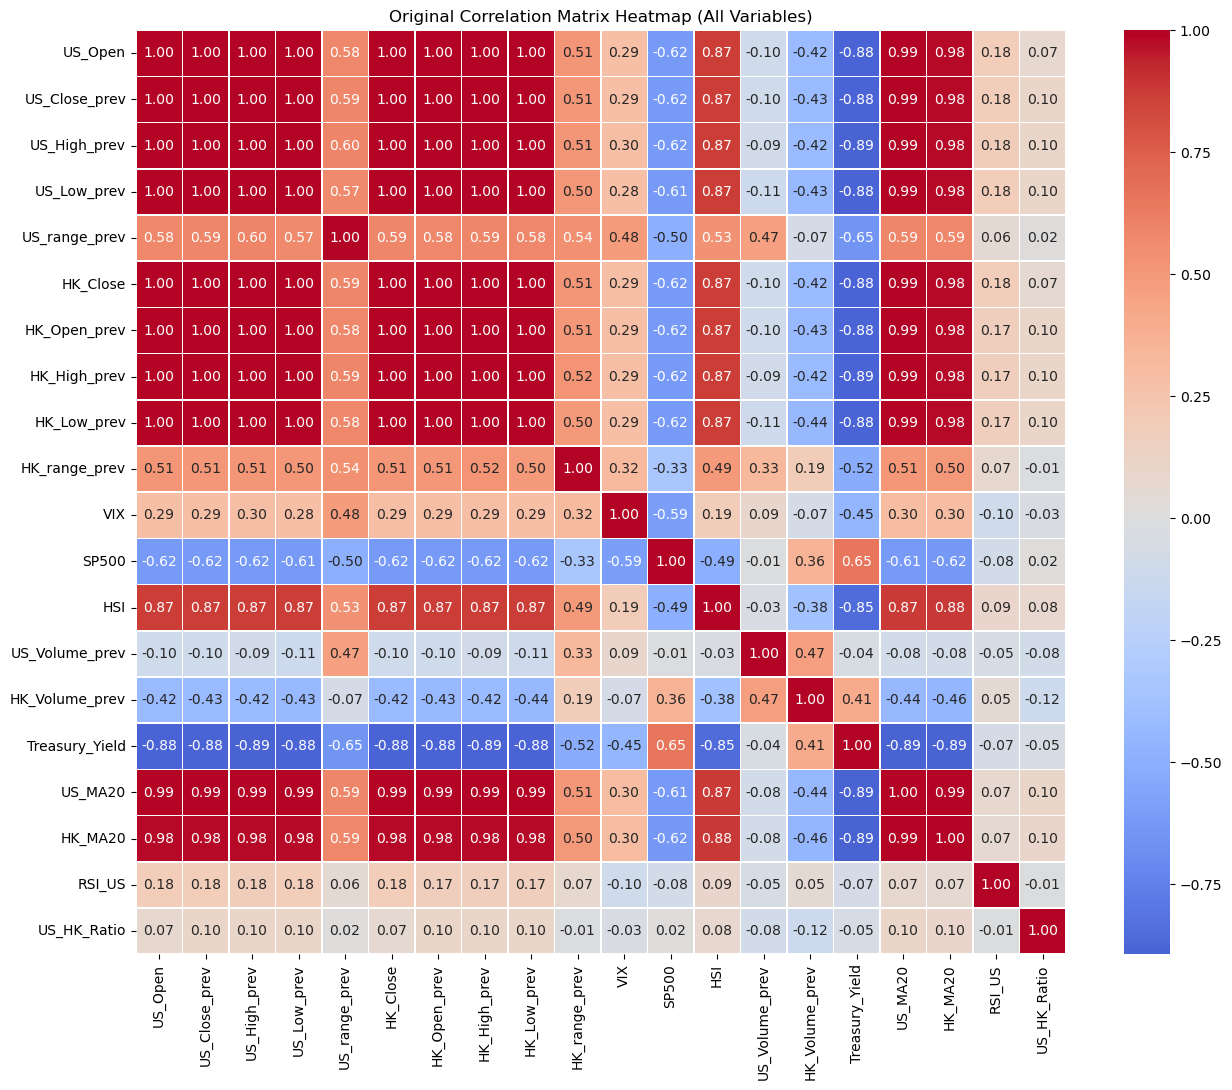

Explained Variance Ratios for Each Principal Component: [0.63093788 0.10691312 0.06642476 0.05334242 0.04729844]


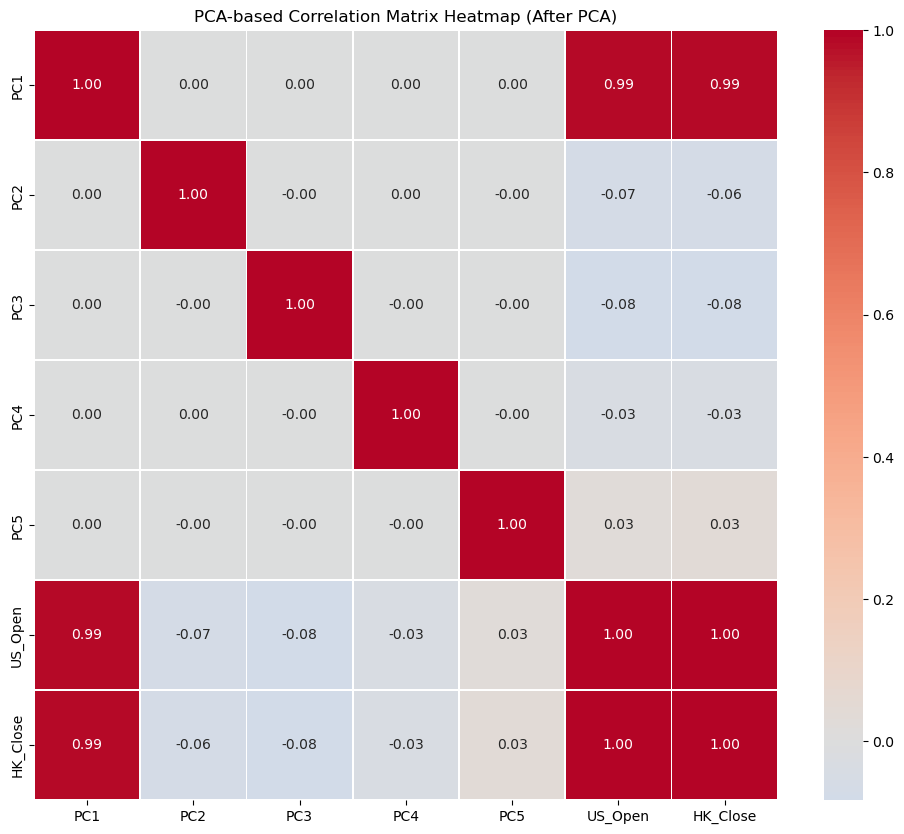

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset 
df = pd.read_csv('stock_data.csv')

# Define features and target (including all variables in the dataset except 'Date' and target)
X = df.drop(columns=['Date', 'US_Open'])
y = df['US_Open']

# Plot and calculate the original correlation matrix for all variables
plt.figure(figsize=(15, 12))
original_corr_matrix = df.corr()
sns.heatmap(original_corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('Original Correlation Matrix Heatmap (All Variables)')
plt.show()

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios for Each Principal Component:", explained_variance)

# Combine PCA features, target, and HK close into a single DataFrame for correlation analysis and saving
data_for_corr = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
data_for_corr['US_Open'] = y
data_for_corr['HK_Close'] = df['HK_Close']

# Calculate the correlation matrix after PCA
corr_matrix = data_for_corr.corr()

# Plotting the correlation matrix heatmap after PCA
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')
plt.title('PCA-based Correlation Matrix Heatmap (After PCA)')
plt.show()

# Save PCA-transformed data to CSV
data_for_corr.to_csv('pca_stock_data.csv', index=False)
